In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 

## User DataFrame

#### Reading data

In [4]:
users_df = pd.read_csv('komodaa/users.csv')

#### To Do List
1. Gender Distribution
2. Users Distribution based on cities
3. Monthly Registration
4. Daily Registration
5. Cites Registration Growth During Period given

#### Get familiar with data

In [5]:
users_df.head()

,uuid,city_uuid,gender,date
0,06abe0e5-c408-4a33-9d81-5bfacc891f15,22972566-8739-40ca-bf19-a270d320dc83,1,2017-10-10 00:14:33
1,33d7f40c-ab30-4517-881c-24d61acc62b8,22972566-8739-40ca-bf19-a270d320dc83,1,2017-10-10 00:14:33
2,392e5ac0-fd87-4ea0-b9e4-bfffe077cca4,22972566-8739-40ca-bf19-a270d320dc83,1,2017-10-10 00:14:33
3,16848d64-b555-4182-a5b4-c0ae1e850e01,22972566-8739-40ca-bf19-a270d320dc83,1,2017-10-10 00:14:33
4,634edd5c-318e-40ec-aeb9-1e863836754d,22972566-8739-40ca-bf19-a270d320dc83,1,2017-10-10 00:14:33


In [11]:
users_df.shape

(6000, 4)

In [16]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uuid       6000 non-null   object
 1   city_uuid  6000 non-null   object
 2   gender     6000 non-null   int64 
 3   date       6000 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB


In [22]:
users_df.duplicated().value_counts()

False    6000
dtype: int64

#### Exploring Data

In [12]:
missing_percentage = users_df.isnull().sum() / users_df.shape[0] * 100
missing_percentage

uuid         0.0
city_uuid    0.0
gender       0.0
date         0.0
dtype: float64

In [18]:
users_df["date"] = pd.to_datetime(users_df.date, cache=True)

print("Start of the period: " , users_df.date.min())
print("End of the period  : " , users_df.date.max() )
print("Time period        : " , users_df.date.max() - users_df.date.min())

Start of the period:  2017-10-10 00:14:33
End of the period  :  2018-10-31 20:44:33
Time period        :  386 days 20:30:00


In [20]:
# Gender Distribution
users_df['gender'].value_counts()

1    6000
Name: gender, dtype: int64

Intersting! All the Users are Male!

In [36]:
# Users distirbution based on cities
cities = pd.DataFrame(users_df['city_uuid'].value_counts())
cities.reset_index(inplace = True)
cities.rename(columns = {'index' : 'city_uuid','city_uuid' : 'Count'}, inplace = True)
cities.head()

,city_uuid,Count
0,d29f1e68-56ce-476f-b09b-c960a4f5674f,1769
1,22972566-8739-40ca-bf19-a270d320dc83,1183
2,308873a5-249c-4bd3-b721-9e5aa54cd0ce,319
3,cb735029-1b57-4f97-99f1-407a3e3dd074,305
4,b4716b80-6d6b-4bdf-82f3-8a735760806c,269


In [37]:
cities.shape

(264, 2)

We have 264 different cities in our dataset!

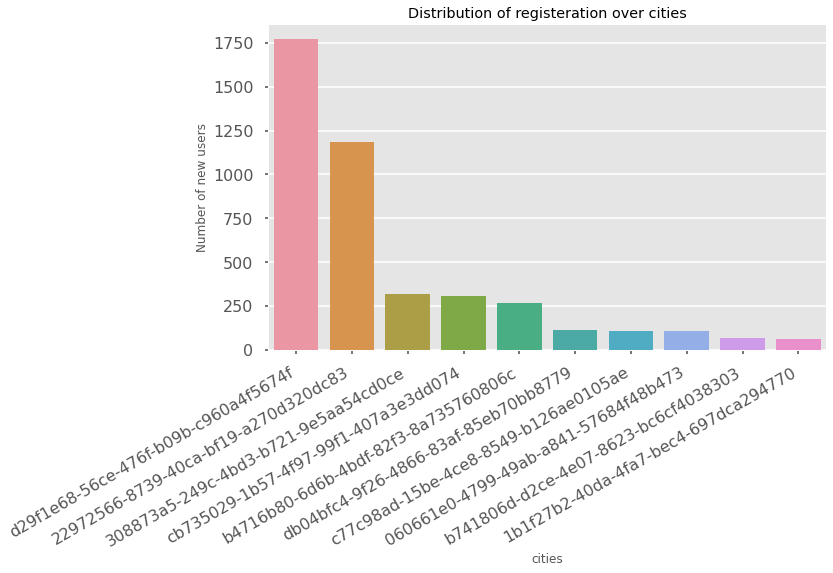

In [63]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

fig= plt.figure(figsize=(10,6))
ax = sns.barplot(x="city_uuid", y="Count", orient= '90',  data=cities.head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')

# Add title and axis names
plt.title('Distribution of registeration over cities')
plt.xlabel('cities', fontsize='12')
plt.ylabel('Number of new users')


# Show graphic
plt.savefig('Images/Distribution of registeration over cities.png',bbox_inches = 'tight')

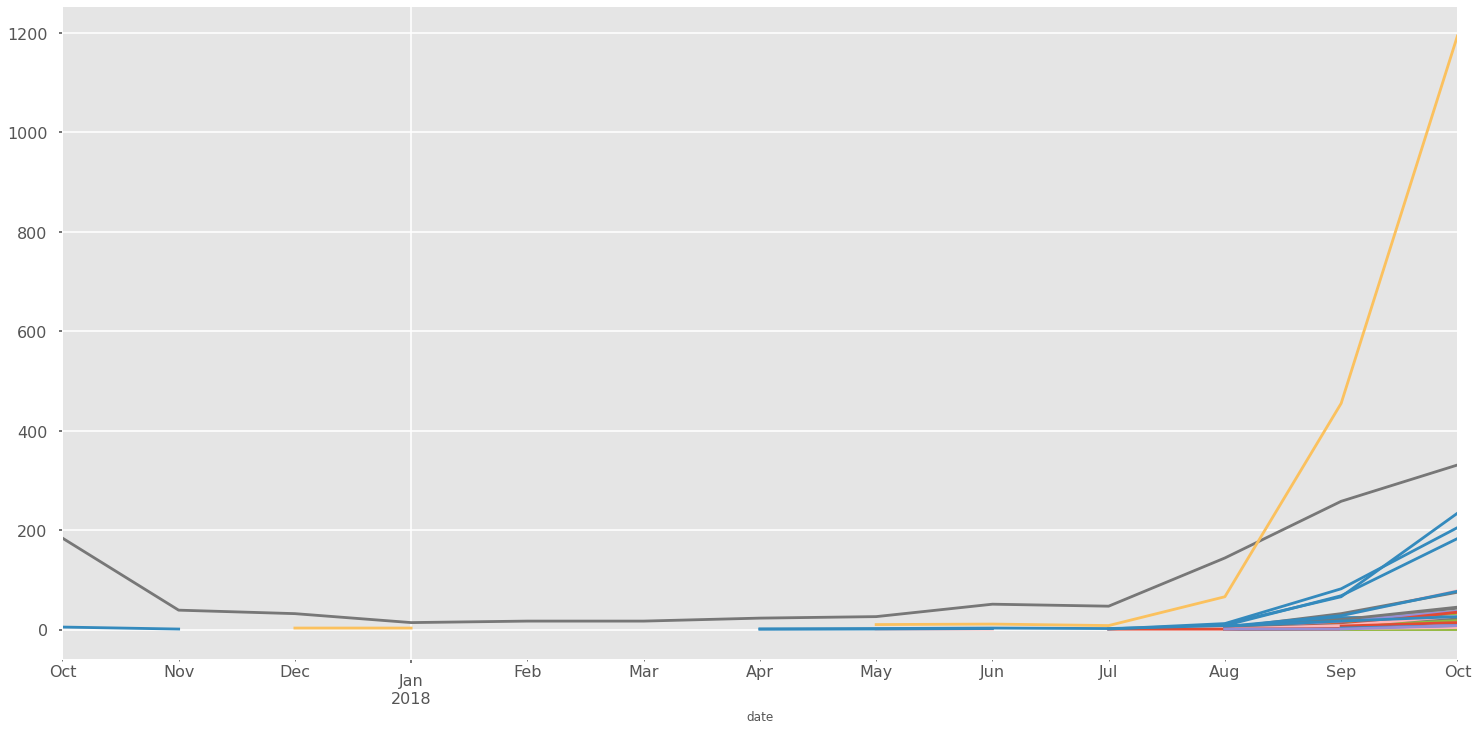

In [129]:
# plot data
fig, ax = plt.subplots(figsize=(25,12))
users_df.groupby([users_df["date"].dt.to_period('M'), users_df.city_uuid],sort=True)['uuid'].count().unstack().plot(ax=ax, legend = False)

In [143]:
city_month_count = pd.DataFrame(users_df.groupby([users_df["date"].dt.to_period('M'), users_df.city_uuid])['uuid'].count())

In [144]:
city_month_count.shape

(494, 1)

In [145]:
city_month_count.head(10)

uuid
date    city_uuid                                 
2017-10 22972566-8739-40ca-bf19-a270d320dc83   184
        22c4976f-4e01-45b9-b05d-0c854e7bd0a0     1
        308873a5-249c-4bd3-b721-9e5aa54cd0ce     5
        4f12d9d2-01ed-4b26-a2f0-b6dc4ae8f398     1
        5796c72a-af37-4ce0-bcfe-9f481ce7ecbe     1
        7a458fd8-cbd8-4e05-9856-943c381df966     1
        821a043c-a8c3-45f1-8a18-d12fa7e2f34b     1
        8921b625-2242-4ff7-ab4d-f23b0c86ae31     1
        907bef2e-4846-44a8-bea1-c5e77c3a328d     2
        a2904f10-a3fe-4682-9efd-b91ccaed2a6d     1

In [146]:
city_month_count.tail(10)

uuid
date    city_uuid                                 
2018-10 f2e22afa-bf8e-47ec-8c13-66895146b436     1
        f77a21b4-a0af-47f2-8d63-a52553ccbf3e     1
        f7a4d6ea-520f-4f12-a7bc-4a8991f8cc95     2
        f7ab4096-947e-488c-8e78-05e197824316     1
        f7af59b4-85c5-48f2-9f68-b53cb899175d     4
        f8599cf8-1268-43d4-9fd9-3df9cdf5963d     1
        f8d0ef97-9f0b-411b-aa9a-69b73a5272e6     8
        f9bedfa1-deaf-41cd-8c06-f6e010a3b487     8
        fb728ded-0321-4a80-b0f5-6ff0ca16bf74     1
        fca5738c-0401-48f1-b446-408fce2a5e98     1

In [147]:
city_month_count = city_month_count[city_month_count['uuid']>5]
city_month_count.head()

uuid
date    city_uuid                                 
2017-10 22972566-8739-40ca-bf19-a270d320dc83   184
        d29f1e68-56ce-476f-b09b-c960a4f5674f    17
2017-11 22972566-8739-40ca-bf19-a270d320dc83    39
2017-12 22972566-8739-40ca-bf19-a270d320dc83    32
2018-01 22972566-8739-40ca-bf19-a270d320dc83    14

In [103]:
# city_month_count.reset_index()

,date,city_uuid,uuid
0,2017-10,22972566-8739-40ca-bf19-a270d320dc83,184
1,2017-10,22c4976f-4e01-45b9-b05d-0c854e7bd0a0,1
2,2017-10,308873a5-249c-4bd3-b721-9e5aa54cd0ce,5
3,2017-10,4f12d9d2-01ed-4b26-a2f0-b6dc4ae8f398,1
4,2017-10,5796c72a-af37-4ce0-bcfe-9f481ce7ecbe,1
...,...,...,...
489,2018-10,f8599cf8-1268-43d4-9fd9-3df9cdf5963d,1
490,2018-10,f8d0ef97-9f0b-411b-aa9a-69b73a5272e6,8
491,2018-10,f9bedfa1-deaf-41cd-8c06-f6e010a3b487,8
492,2018-10,fb728ded-0321-4a80-b0f5-6ff0ca16bf74,1


#### Exploring Users registeration based on Month, Day and Hour

In [38]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uuid       6000 non-null   object        
 1   city_uuid  6000 non-null   object        
 2   gender     6000 non-null   int64         
 3   date       6000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 187.6+ KB


#### Month

In [59]:
# Create a column containing the month
users_df['month'] = pd.to_datetime(users_df['date']).dt.to_period('M')
months = users_df['month'].sort_values()

month = pd.DataFrame(users_df.month.value_counts())
month.reset_index(inplace = True)
month.rename(columns = {'index' : 'Month','month' : 'Count'}, inplace = True)
month.sort_values(by=['Month'], inplace = True)
month.head()

,Month,Count
3,2017-10,226
7,2017-11,41
8,2017-12,36
12,2018-01,18
11,2018-02,18


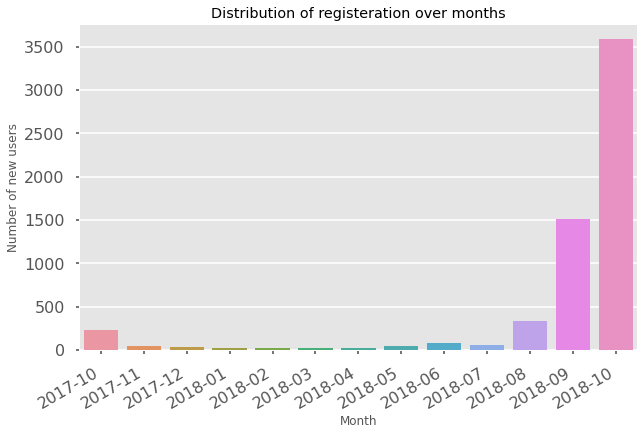

In [62]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

fig= plt.figure(figsize=(10,6))
ax = sns.barplot(x="Month", y="Count", orient= '90',  data=month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')

# Add title and axis names
plt.title('Distribution of registeration over months')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Number of new users')


# Show graphic
plt.savefig('Images/Distribution of registeration over months.png',bbox_inches = 'tight')

#### Day

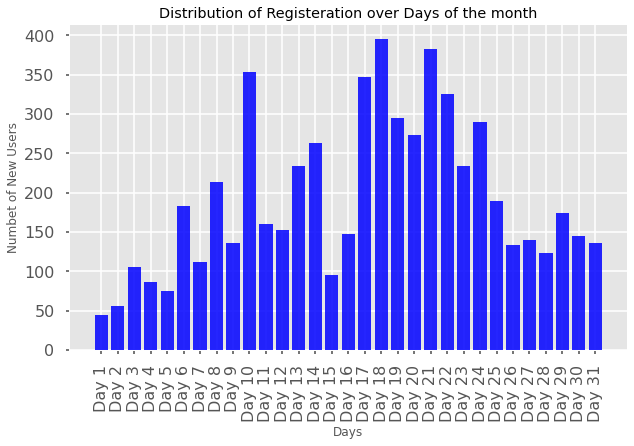

In [78]:
# Daily distribution count
daily_count = users_df.groupby(users_df["date"].dt.day, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,32):
    bars.append('Day '+str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, daily_count.date, color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of Registeration over Days of the month')
plt.xlabel('Days', fontsize='12')
plt.ylabel('Numbet of New Users')

 
# Show graphic
plt.savefig('Images/Distribution of new Users over days.png',bbox_inches = 'tight')
plt.show()


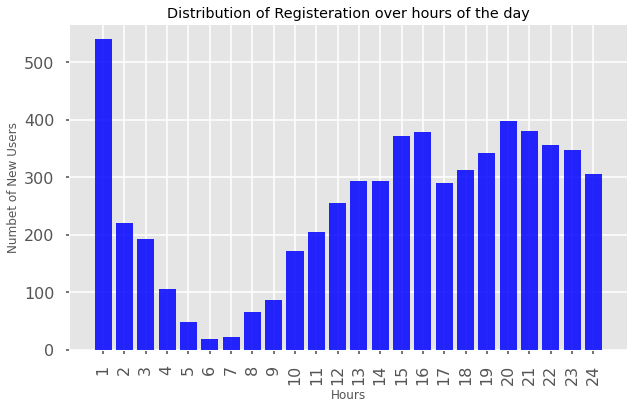

In [79]:
# Monthly distribution count
hourly_count = users_df.groupby(users_df["date"].dt.hour, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,25):
    bars.append(str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, hourly_count.date,color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of Registeration over hours of the day')
plt.xlabel('Hours', fontsize='12')
plt.ylabel('Numbet of New Users')

 
# Show graphic
plt.savefig('Images/Distribution of Registeration over hours.png',bbox_inches = 'tight')
plt.show()

## Follows DataFrame

#### Read Data

In [3]:
follows_df = pd.read_csv('komodaa/follows.csv')
follows_df.head()

,user_uuid,follow_uuid,date
0,7effce15-12ba-469c-b4b4-b529425488db,372fe527-470c-48a3-a95e-fe32cc4bcc15,2018-10-05 18:47:56
1,f262a138-9585-4570-9d2d-6815c4d8b6a6,ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd,2020-06-29 14:57:37
2,18566d57-99ea-4f5d-aa23-7769f1b0dcc2,2098ef7a-9215-4d2e-8e95-0ab7e745392f,2019-09-02 08:15:12
3,958029e7-6897-4ae2-be6c-515730568371,498439f1-52ed-4e3d-b07a-fe77061837b5,2018-09-05 05:02:57
4,4afbf6d4-b841-44b1-8f04-eba6e6b102e3,498439f1-52ed-4e3d-b07a-fe77061837b5,2018-09-06 21:59:08


#### To Do List
1. Most Active Users
2. Users Network (Directed Network)
3. Community Detection
4. Active Users Activites over period given

#### Get familiar with data

In [4]:
follows_df.shape

(5886, 3)

In [6]:
follows_df['user_uuid'].value_counts()

3cef3fd4-984e-481b-89da-c0692bcc529b    277
7f61564b-4203-4fb6-ac6a-2cc555465ed6    119
e5b4f882-7dca-4e63-a665-f412cb383e39    110
e54cea93-9399-47c1-9c57-be1571252e0a    106
5dda1c4a-8b66-440b-896c-8c0be38645b9     79
                                       ... 
9c18d94d-50e7-4331-acc8-6981d382665b      1
124a3d94-49f5-4c2b-8683-112c7aa4fc1b      1
7ed3c1d4-ad71-4fa1-98c9-5e264929ae27      1
463d5cc8-f4eb-47f2-8efb-eeef1b52149e      1
202def3f-fe21-43f4-969c-8f8b39ccdc8d      1
Name: user_uuid, Length: 1454, dtype: int64

In [7]:
follows_df['follow_uuid'].value_counts()

233255de-55b8-4a46-800f-172a58016eec    263
17fc2fcd-55d4-4342-a553-302e56d6d816    205
1ed79a26-26f7-4ce9-a711-a4fe0ea5e285    165
3cef3fd4-984e-481b-89da-c0692bcc529b    153
cc998035-b8c6-40bf-b9c9-0edb04b73af7    151
                                       ... 
ed083aef-8385-4361-ab6b-fcba83b289bb      1
a4806d25-4ac9-4ac6-9361-2e1eb26689b2      1
653dce63-9309-46ac-ae30-806148e30f93      1
eea65d2a-293e-4fe8-af7a-37fd91d38894      1
98175ed8-fd86-47e0-9cc4-ba325e1b4063      1
Name: follow_uuid, Length: 993, dtype: int64

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
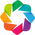

In [13]:
import holoviews as hv
import networkx as nx
from holoviews import opts

hv.extension('bokeh')

defaults = dict(width=1000, height=1000)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

In [14]:
source = follows_df['user_uuid']
target = follows_df['follow_uuid']
simple_graph = hv.Graph(((source, target),))
simple_graph

:Graph   [start,end]

In [19]:
follows_df.head()

,user_uuid,follow_uuid,date
0,7effce15-12ba-469c-b4b4-b529425488db,372fe527-470c-48a3-a95e-fe32cc4bcc15,2018-10-05 18:47:56
1,f262a138-9585-4570-9d2d-6815c4d8b6a6,ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd,2020-06-29 14:57:37
2,18566d57-99ea-4f5d-aa23-7769f1b0dcc2,2098ef7a-9215-4d2e-8e95-0ab7e745392f,2019-09-02 08:15:12
3,958029e7-6897-4ae2-be6c-515730568371,498439f1-52ed-4e3d-b07a-fe77061837b5,2018-09-05 05:02:57
4,4afbf6d4-b841-44b1-8f04-eba6e6b102e3,498439f1-52ed-4e3d-b07a-fe77061837b5,2018-09-06 21:59:08


In [5]:
nodes = follows_df.user_uuid.unique()

In [6]:
num_nodes = len (nodes)

In [7]:
edges = follows_df[['user_uuid','follow_uuid']]

In [8]:
from graphviz import Digraph
dot = Digraph(comment='VIP graph')

In [46]:
nodes_G = []
for node in edges[:100]['user_uuid']:
    if node not in nodes_G:
        nodes_G.append(node)
for node in edges[:100]['follow_uuid']:
    if node not in nodes_G:
        nodes_G.append(node)

In [47]:
dot = Digraph(comment='VIP graph')
for i in range(len(nodes_G)):
    dot.node(nodes_G[i])
for i in range(len(edges[:10])):
    edge = edges.iloc[i]
    dot.edge(edge['user_uuid'], edge['follow_uuid'])

In [48]:
dot.render('VIP-graph_20.gv', view=True)

'VIP-graph_20.gv.pdf'

In [ ]:
from graphviz import Digraph

G = Digraph(format='jpeg')

G.attr(rankdir='LR', size='8,5')
G.attr('node', shape='circle')

nodelist = []
for idx, row in edges.iterrows():
    node1, node2 = [str(i) for i in row]

    if node1 not in nodelist:
        G.node(node1)
        nodelist.append(node2)
    if node2 not in nodelist:
        G.node(node2)
        nodelist.append(node2)

    G.edge(node1,node2)

G.render('sg', view=True)

## Products DataFrame

#### Read Data

In [2]:
products_df = pd.read_csv('komodaa/products.csv')
products_df.head()

,uuid,user_uuid,category_uuid,city_uuid,is_new,is_homemade,original_price,price,comments_count,bookmarks_count,gender,date
0,33949611-a3e4-440a-83b1-6cc1a2602b8b,06abe0e5-c408-4a33-9d81-5bfacc891f15,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,0,0,0,15000,0,0,1,2019-12-19 02:42:28
1,a55fbc5e-b0b1-43c8-b25b-57685d2ee242,16848d64-b555-4182-a5b4-c0ae1e850e01,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,1,0,550000,300000,0,1,1,2019-12-19 02:42:28
2,d895881f-6570-4ab6-9756-367c12b1ab44,16848d64-b555-4182-a5b4-c0ae1e850e01,8ff26775-1571-4a9e-904c-cd7951ba93ea,22972566-8739-40ca-bf19-a270d320dc83,1,0,92000,50000,1,4,1,2019-12-19 02:42:28
3,c0a45353-2453-442f-ae45-d741ac5ecdc3,16848d64-b555-4182-a5b4-c0ae1e850e01,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,1,0,310000,230000,6,1,1,2020-04-19 14:49:54
4,00871ece-294a-4b1e-be51-2d72ac1205f7,16848d64-b555-4182-a5b4-c0ae1e850e01,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,1,0,310000,230000,4,0,1,2020-04-19 14:53:57


#### To Do List
1. Users with Most Items
2. Most popular Category
3. Cities with most Item
4. New vs Old
5. Homemade vs Manufacture
6. Orginal Price Distribution
7. Price Distribution
8. Items with most Discount
9. Most Generous Cities
10. Most Generous users
11. Items with most Comments
12. Items with most bookmarks
13. Gender Distiribution of the items
14. Seasons and categories
15. Seasons and price


#### Get familiar with data

In [3]:
products_df.shape

(22893, 12)

In [4]:
products_df.describe()

,is_new,is_homemade,original_price,price,comments_count,bookmarks_count,gender
count,22893.000000,22893.000000,2.289300e+04,2.289300e+04,22893.000000,22893.000000,22893.0
mean,0.505351,0.039619,1.516705e+06,2.266964e+05,1.747215,4.979775,1.0
std,0.499982,0.195067,4.960554e+07,1.553110e+07,4.348163,11.320011,0.0
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0
25%,0.000000,0.000000,6.000000e+04,2.700000e+04,0.000000,0.000000,1.0
50%,1.000000,0.000000,1.200000e+05,5.000000e+04,0.000000,2.000000,1.0
75%,1.000000,0.000000,2.000000e+05,9.000000e+04,2.000000,5.000000,1.0
max,1.000000,1.000000,2.147484e+09,2.147484e+09,115.000000,272.000000,1.0


In [5]:
missing_percentage = products_df.isnull().sum() / products_df.shape[0] * 100
missing_percentage

uuid               0.0
user_uuid          0.0
category_uuid      0.0
city_uuid          0.0
is_new             0.0
is_homemade        0.0
original_price     0.0
price              0.0
comments_count     0.0
bookmarks_count    0.0
gender             0.0
date               0.0
dtype: float64

Text(0, 0.5, 'Frequency')

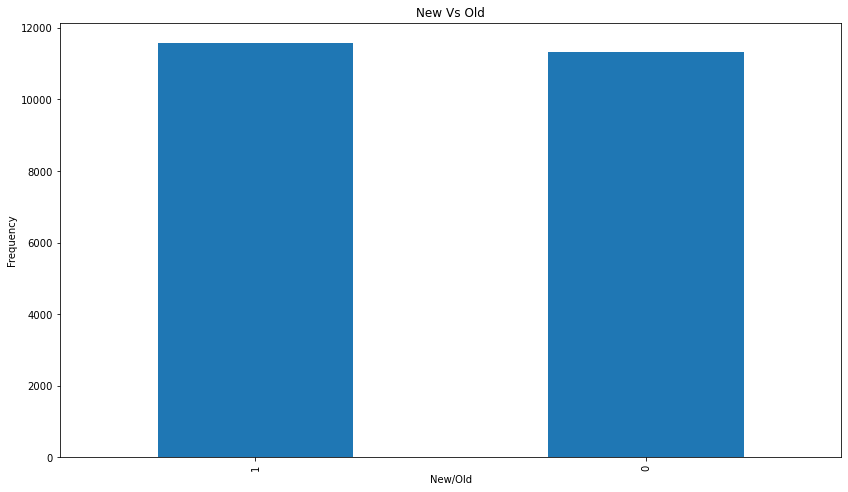

In [6]:
ax = products_df['is_new'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="New Vs Old")
ax.set_xlabel("New/Old")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

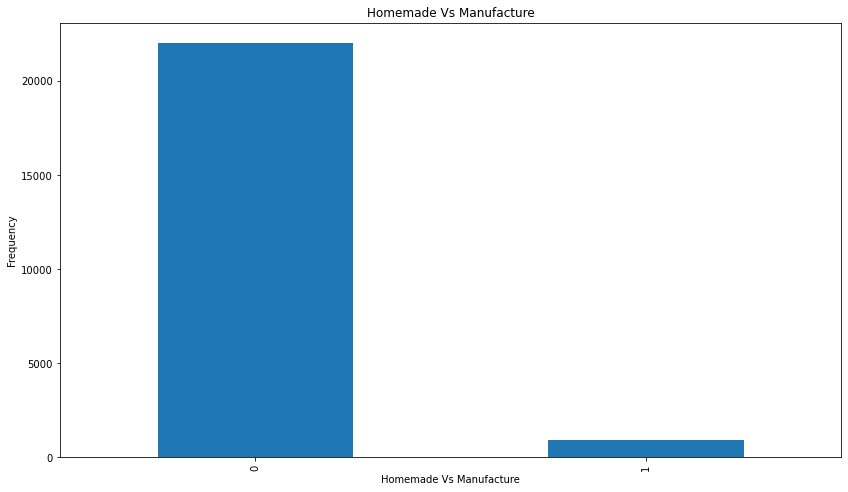

In [7]:
ax = products_df['is_homemade'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Homemade Vs Manufacture")
ax.set_xlabel("Homemade Vs Manufacture")
ax.set_ylabel("Frequency")

In [8]:
products_df.columns

Index(['uuid', 'user_uuid', 'category_uuid', 'city_uuid', 'is_new',
       'is_homemade', 'original_price', 'price', 'comments_count',
       'bookmarks_count', 'gender', 'date'],
      dtype='object')

In [13]:
products_df['comments_count'].value_counts()

0      14623
1       1725
2       1597
3       1251
4        958
       ...  
102        1
73         1
58         1
60         1
87         1
Name: comments_count, Length: 62, dtype: int64

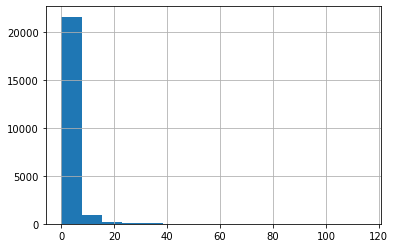

In [12]:
hist = products_df['comments_count'].hist(bins=15)

In [14]:
products_df['bookmarks_count'].value_counts()

0      7379
1      3557
2      2445
3      1629
4      1299
       ... 
66        1
59        1
75        1
139       1
71        1
Name: bookmarks_count, Length: 127, dtype: int64

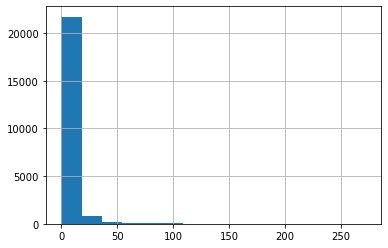

In [11]:
hist = products_df['bookmarks_count'].hist(bins=15)

In [16]:
price = products_df[['original_price','price']]

In [17]:
price

,original_price,price
0,0,15000
1,550000,300000
2,92000,50000
3,310000,230000
4,310000,230000
...,...,...
22888,260000,100000
22889,250000,100000
22890,200000,80000
22891,150000,50000


In [26]:
price = price[price['original_price']!=0]

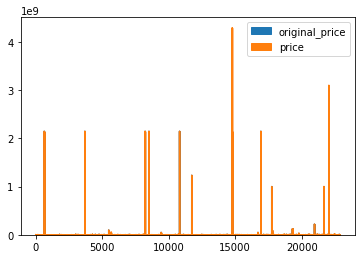

In [27]:
ax = price.plot.area()

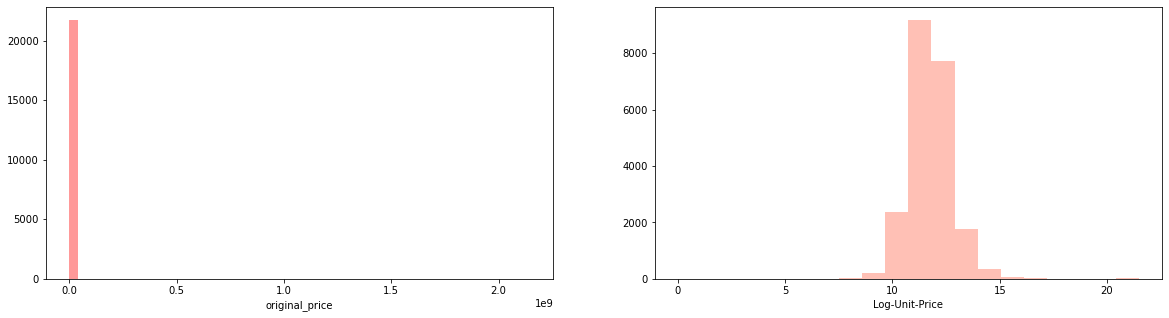

In [28]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(price.original_price, ax=ax[0], kde=False, color="red")
sns.distplot(np.log(price.original_price), ax=ax[1], bins=20, color="tomato", kde=False)
ax[1].set_xlabel("Log-Unit-Price");

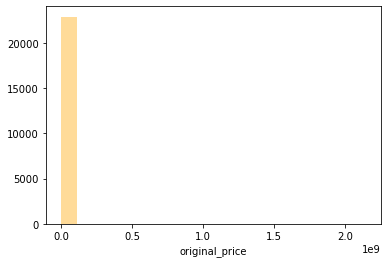

In [21]:
sns.distplot(price.original_price,
             kde=False,
             bins=20,
             color="Orange")

In [22]:
price['original_price'].value_counts()

150000     1218
100000     1182
0          1143
120000     1093
50000       930
           ... 
120           1
2900000       1
4800000       1
114000        1
1950000       1
Name: original_price, Length: 480, dtype: int64

In [23]:
price.original_price.describe()

count    2.289300e+04
mean     1.516705e+06
std      4.960554e+07
min      0.000000e+00
25%      6.000000e+04
50%      1.200000e+05
75%      2.000000e+05
max      2.147484e+09
Name: original_price, dtype: float64

In [24]:
price.price.describe()

count    2.289300e+04
mean     2.266964e+05
std      1.553110e+07
min      0.000000e+00
25%      2.700000e+04
50%      5.000000e+04
75%      9.000000e+04
max      2.147484e+09
Name: price, dtype: float64

In [29]:
products_df.columns

Index(['uuid', 'user_uuid', 'category_uuid', 'city_uuid', 'is_new',
       'is_homemade', 'original_price', 'price', 'comments_count',
       'bookmarks_count', 'gender', 'date'],
      dtype='object')

In [30]:
products_df.head()

,uuid,user_uuid,category_uuid,city_uuid,is_new,is_homemade,original_price,price,comments_count,bookmarks_count,gender,date
0,33949611-a3e4-440a-83b1-6cc1a2602b8b,06abe0e5-c408-4a33-9d81-5bfacc891f15,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,0,0,0,15000,0,0,1,2019-12-19 02:42:28
1,a55fbc5e-b0b1-43c8-b25b-57685d2ee242,16848d64-b555-4182-a5b4-c0ae1e850e01,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,1,0,550000,300000,0,1,1,2019-12-19 02:42:28
2,d895881f-6570-4ab6-9756-367c12b1ab44,16848d64-b555-4182-a5b4-c0ae1e850e01,8ff26775-1571-4a9e-904c-cd7951ba93ea,22972566-8739-40ca-bf19-a270d320dc83,1,0,92000,50000,1,4,1,2019-12-19 02:42:28
3,c0a45353-2453-442f-ae45-d741ac5ecdc3,16848d64-b555-4182-a5b4-c0ae1e850e01,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,1,0,310000,230000,6,1,1,2020-04-19 14:49:54
4,00871ece-294a-4b1e-be51-2d72ac1205f7,16848d64-b555-4182-a5b4-c0ae1e850e01,aa9c2861-90e8-4210-994b-332ecab092fd,22972566-8739-40ca-bf19-a270d320dc83,1,0,310000,230000,4,0,1,2020-04-19 14:53:57


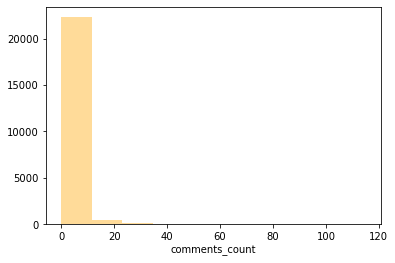

In [34]:
sns.distplot(products_df.comments_count,
             kde=False,
             bins=10,
             color="Orange")

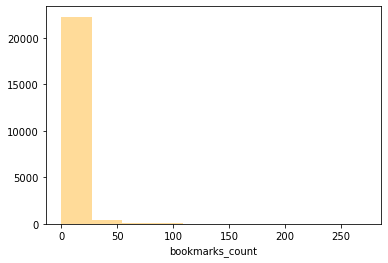

In [35]:
sns.distplot(products_df.bookmarks_count,
             kde=False,
             bins=10,
             color="Orange")

## Purchase DataFrame

In [36]:
purchase_df = pd.read_csv('komodaa/purchases.csv')
purchase_df.head()

,buyer_uuid,product_uuid,count,date
0,372fe527-470c-48a3-a95e-fe32cc4bcc15,99863785-21e9-4ebc-ae7a-8c558d8421b4,1,2018-02-15 17:38:52
1,970ef8d9-c50e-4821-9687-145379af2b9a,e68a5832-7292-4a54-ad92-02f31a46494c,1,2017-02-16 00:47:16
2,970ef8d9-c50e-4821-9687-145379af2b9a,ecd1b68f-9db4-49f5-bac5-5679d9f9d784,1,2018-03-01 15:10:23
3,0bc6742f-d58a-4539-b85b-62bc3463033b,af59299c-2d08-4993-9be0-cfd7e641ae0d,1,2017-12-17 12:49:20
4,233255de-55b8-4a46-800f-172a58016eec,0cd2b781-bd44-40cf-9422-a50dac21f4b5,1,2018-03-12 20:26:13


#### To Do List
1. Users with Most purchase
2. Seasons with Most Purchase

In [39]:
purchase_df.buyer_uuid.value_counts()

2678a5ce-7804-4b90-8631-bca481a3f1e1    10
233255de-55b8-4a46-800f-172a58016eec     7
6ca2c651-d8b6-4184-956e-5d4adb5595ca     7
a8fdf07d-f3d8-40ca-bcfc-cbf494a80e9d     6
1a84101f-78d0-4f2e-bb24-e4bf1dc3afbd     6
                                        ..
c5fcf9c0-f5c4-48a2-8a5b-00ff637f71e0     1
237d01c6-d946-4eb0-a2ee-1bc7bd57e13e     1
7dddd8ea-4fff-4b18-bebf-dbb706566c32     1
61c3b4b1-e33a-47d6-b62a-3dd2c78e4497     1
4839e630-3911-43d0-bc23-3c2acf63c599     1
Name: buyer_uuid, Length: 107, dtype: int64

## Join tables
1. join User table & Follow table
2. Join Product table & Purchase table